<a href="https://colab.research.google.com/github/sindhukondepati/FMML_M1L1/blob/main/FMML_M1L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1

In [33]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [34]:
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [35]:
eng2[:500]

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but se'

This is what the text looks like in French:

In [36]:
fr2[:500]

"Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd'hui à trois espèces réparties en deux genres distincts. L'éléphant de savane d'Afrique et l'éléphant de forêt d'Afrique, autrefois regroupés sous la même espèce d'« éléphant d'Afrique », appartiennent au genre Loxodonta, tandis que l'éléphant d'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les élép"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [37]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [38]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [39]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [40]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [41]:
def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

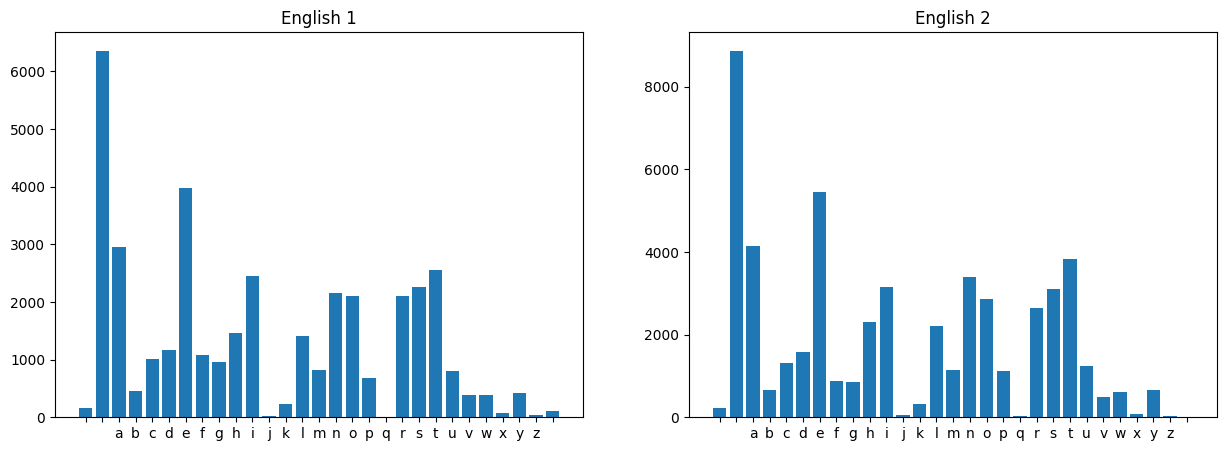

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



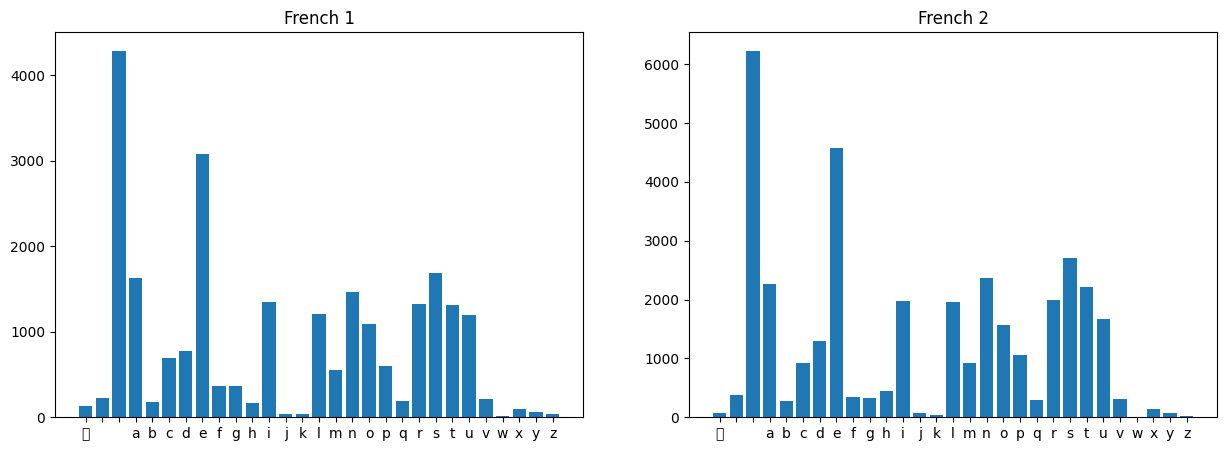

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

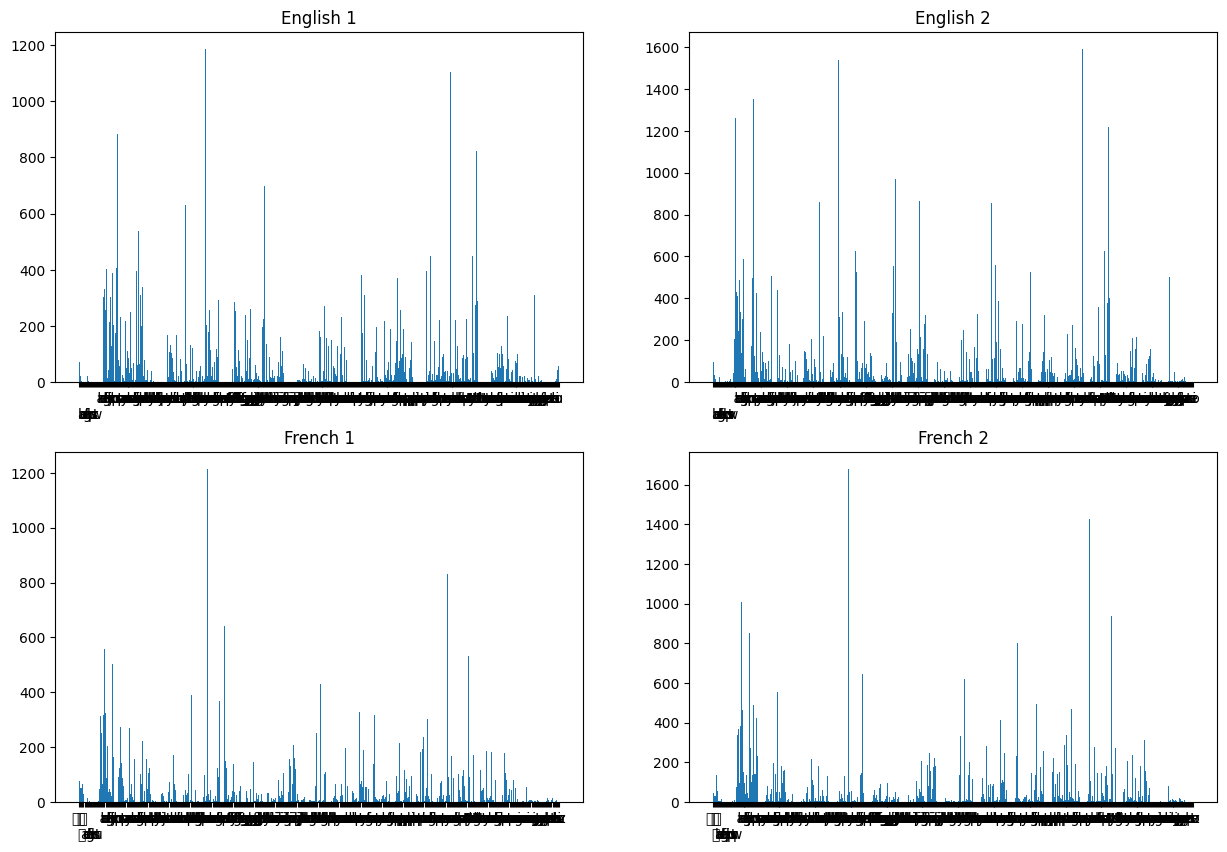

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [45]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

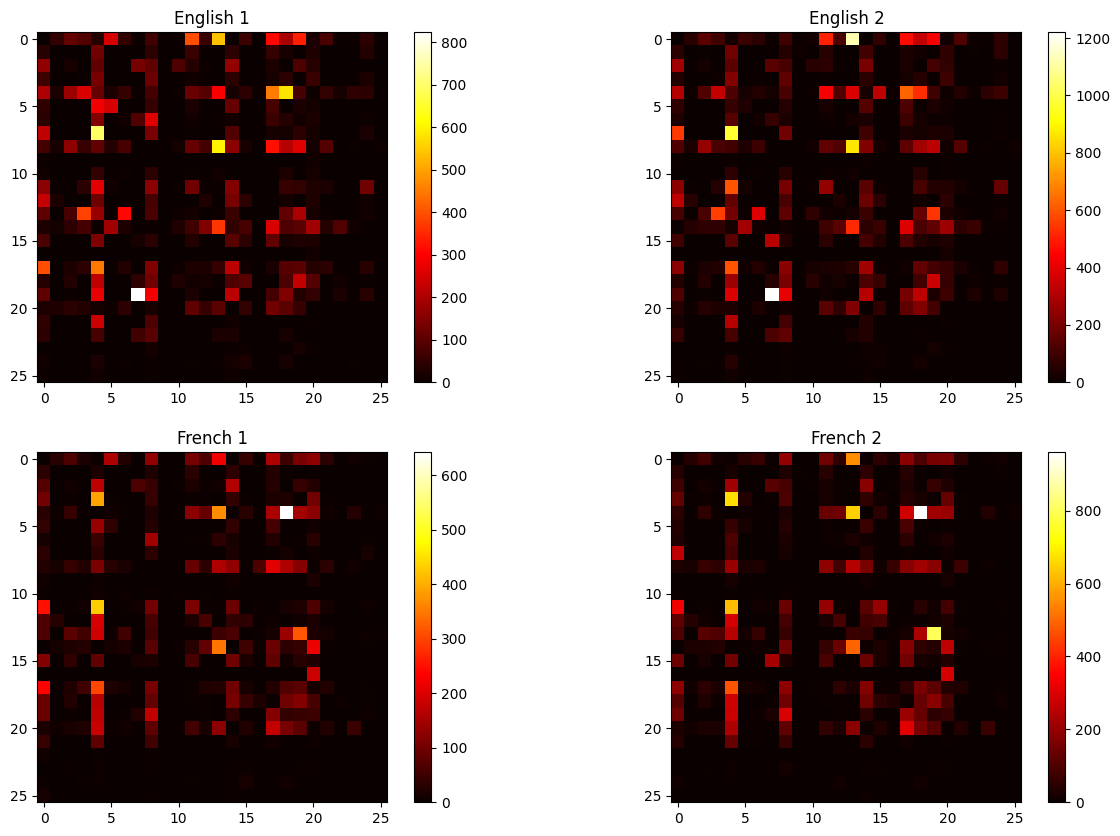

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [47]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [48]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 823.0
('h', 'e') : 697.0
('i', 'n') : 601.0
('e', 's') : 579.0
('a', 'n') : 539.0
('e', 'r') : 451.0
('r', 'e') : 449.0
('r', 'a') : 396.0
('a', 'l') : 396.0
('n', 'd') : 380.0

English 2:
('t', 'h') : 1220.0
('a', 'n') : 1122.0
('h', 'e') : 970.0
('i', 'n') : 867.0
('e', 'r') : 628.0
('r', 'e') : 599.0
('l', 'e') : 597.0
('n', 'd') : 561.0
('h', 'a') : 552.0
('n', 't') : 540.0

French 1:
('e', 's') : 642.0
('l', 'e') : 431.0
('d', 'e') : 392.0
('e', 'n') : 370.0
('o', 'n') : 348.0
('n', 't') : 318.0
('r', 'e') : 301.0
('l', 'a') : 250.0
('r', 'a') : 237.0
('a', 'n') : 223.0

French 2:
('e', 's') : 960.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 620.0
('a', 'n') : 554.0
('o', 'n') : 494.0
('r', 'e') : 469.0
('l', 'a') : 333.0
('u', 'r') : 311.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

> Exercise: Try to extract trigrams and visualize the top 10 trigrams for each text.

# Part 2: Written numbers

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

In [49]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [50]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]

Let us visualize a few images here:

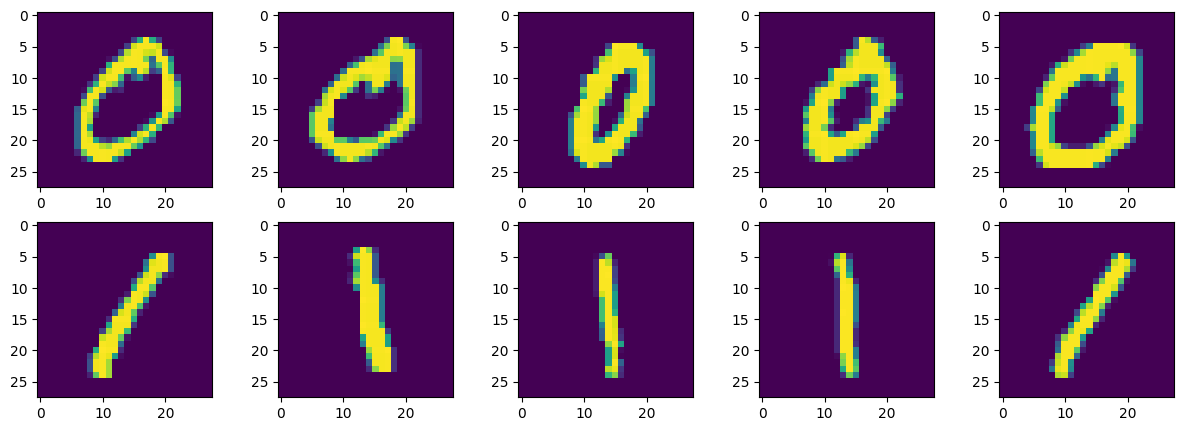

In [51]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [52]:
sum1 = np.sum(no1 > 0, (1, 2))  # threshold before adding up
sum0 = np.sum(no0 > 0, (1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

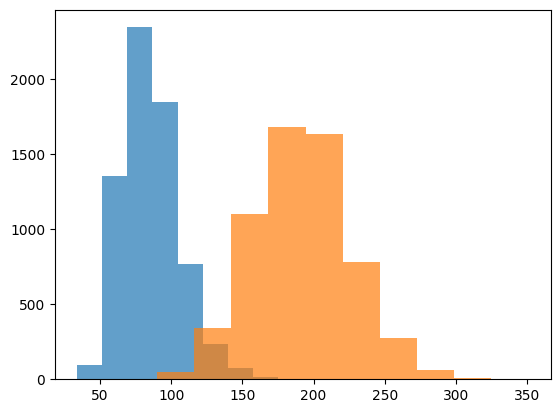

In [53]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [54]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

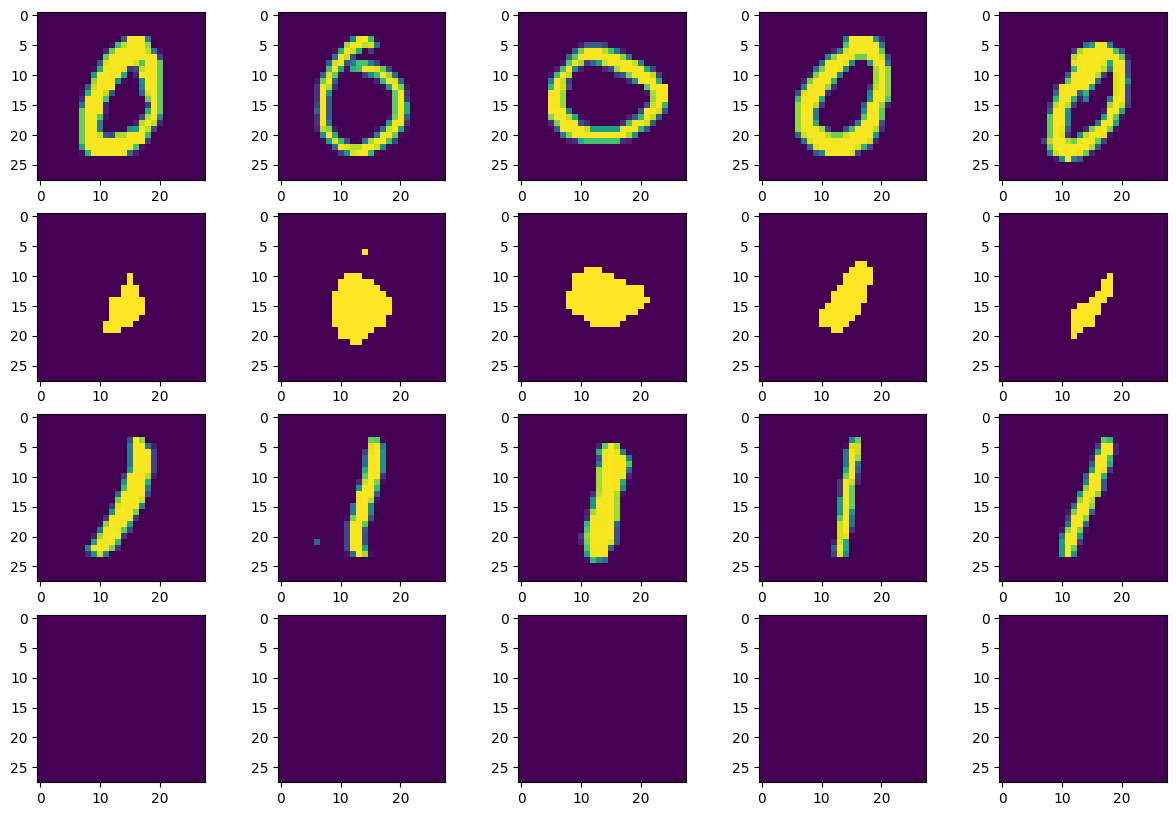

In [55]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

Now let us plot the number of hole pixels and see how this feature behaves

(array([ 163.,  663., 1199., 1355., 1138.,  834.,  401.,  127.,   36.,
           7.]),
 array([  0. ,  18.9,  37.8,  56.7,  75.6,  94.5, 113.4, 132.3, 151.2,
        170.1, 189. ]),
 <BarContainer object of 10 artists>)

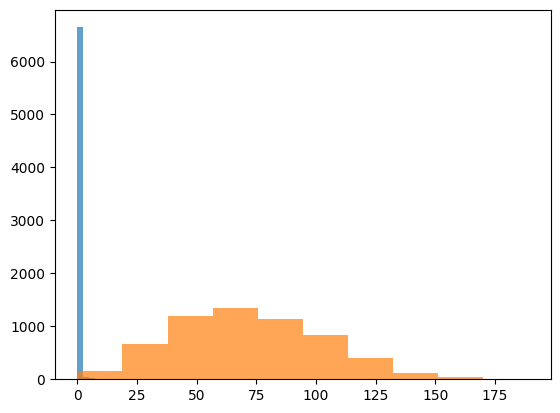

In [56]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [57]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

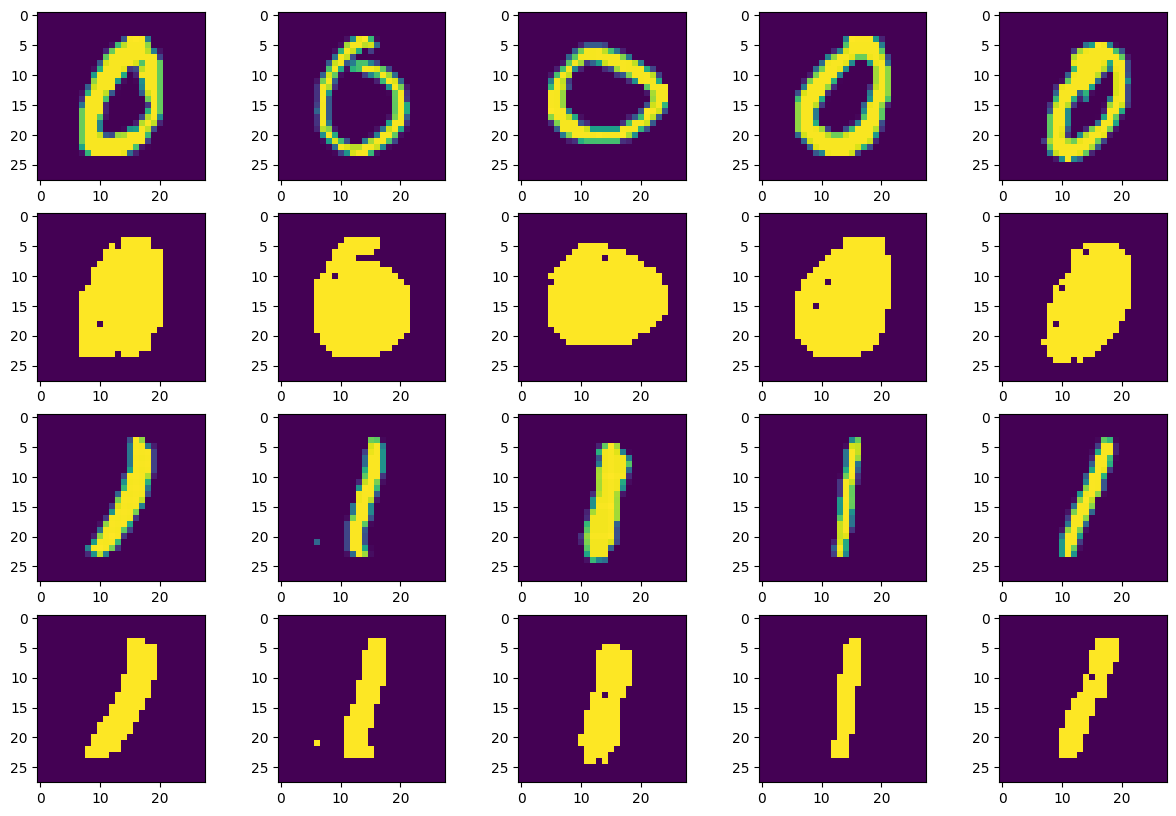

In [58]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

Plotting the number of hull pixels versus the digit:

(array([  10.,   64.,  245.,  611., 1042., 1379., 1395.,  917.,  251.,
           9.]),
 array([113. , 139.3, 165.6, 191.9, 218.2, 244.5, 270.8, 297.1, 323.4,
        349.7, 376. ]),
 <BarContainer object of 10 artists>)

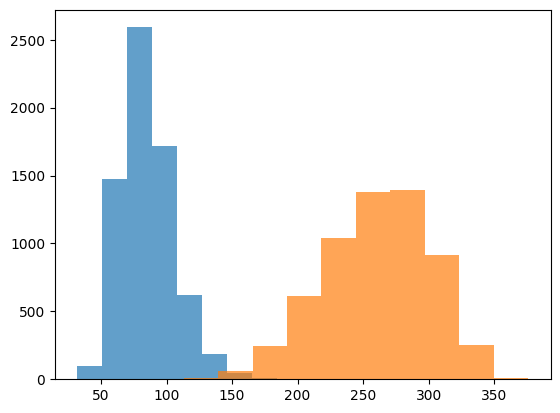

In [59]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [60]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

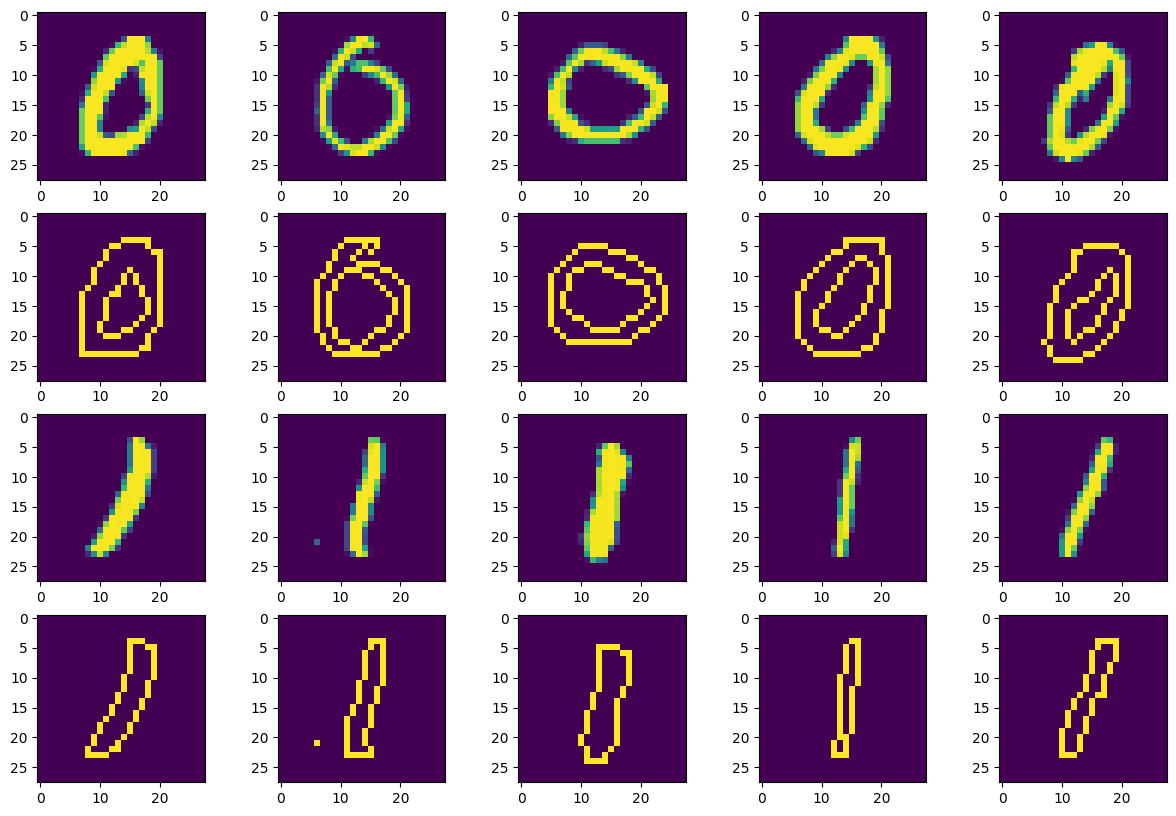

In [61]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([  14.,   21.,   99.,  450., 1300., 2262., 1339.,  375.,   52.,
          11.]),
 array([ 48. ,  55.2,  62.4,  69.6,  76.8,  84. ,  91.2,  98.4, 105.6,
        112.8, 120. ]),
 <BarContainer object of 10 artists>)

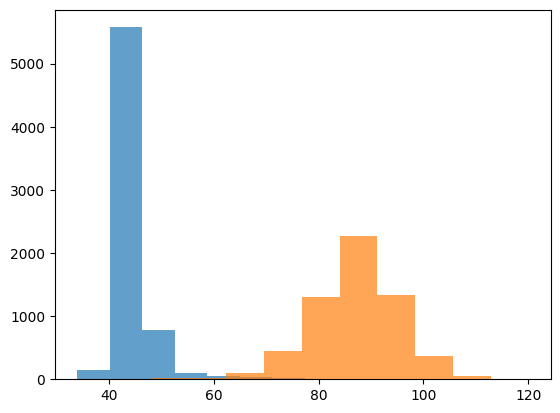

In [62]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

What will happen if we plot two features together?

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?

To determine the best feature combination, we can employ various techniques:
 * Correlation Analysis: Calculate the correlation between each feature and the target variable. Features with high correlation are likely to be informative.
 * Feature Importance: Utilize machine learning algorithms like Random Forest or XGBoost, which provide feature importance scores indicating their contribution to the model's performance.
 * Feature Selection Algorithms: Methods like Recursive Feature Elimination (RFE) or Filter-based methods can identify the most relevant features by iteratively removing less informative ones.
 * Trial and Error: Experiment with different combinations of features and evaluate their performance using a suitable metric (e.g., accuracy, F1-score) on a validation dataset.
By combining these approaches, we can identify the optimal feature subset that effectively represents the underlying patterns in the data and leads to improved model performance.
2. How would you test or visualize four or more features?
Testing or visualizing four or more features depends on the type of data you're working with and the goals of your analysis. Here are some common methods:

### 1. **Scatter Plot Matrix (Pair Plot)**
   - **What it is:** A grid of scatter plots showing relationships between each pair of features.
   - **When to use:** When you want to visualize pairwise relationships among features.
   - **Tools:** Seaborn’s `pairplot()` or Pandas `scatter_matrix()`.

### 2. **Heatmap**
   - **What it is:** A visual representation of data where individual values are represented by colors.
   - **When to use:** To show the correlation between features.
   - **Tools:** Seaborn’s `heatmap()`.

### 3. **Parallel Coordinates Plot**
   - **What it is:** A plot that represents each feature as a vertical line, with each data point as a line connecting them.
   - **When to use:** To visualize patterns and trends across multiple features.
   - **Tools:** Matplotlib’s `parallel_coordinates()` or Plotly.

### 4. **Principal Component Analysis (PCA)**
   - **What it is:** A dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space.
   - **When to use:** To visualize how the features relate in a reduced dimension (2D or 3D).
   - **Tools:** Scikit-learn’s `PCA()` or Seaborn's `pairplot()` after applying PCA.

### 5. **Radial Plot (Spider Plot)**
   - **What it is:** A plot that represents each feature as a spoke on a wheel, with data points plotted as a polygon.
   - **When to use:** To compare multiple features at once.
   - **Tools:** Matplotlib’s `radar_chart()`.

### 6. **3D Scatter Plot**
   - **What it is:** A three-dimensional scatter plot where each axis represents one feature, and color or size can represent additional features.
   - **When to use:** When you have three features to visualize simultaneously, and the fourth can be represented by color, size, or shape.
   - **Tools:** Matplotlib, Plotly.

### 7. **t-SNE or UMAP**
   - **What it is:** Non-linear dimensionality reduction techniques that preserve local structures.
   - **When to use:** When you want to visualize clusters or patterns in high-dimensional data.
   - **Tools:** Scikit-learn, UMAP-learn.

### 8. **Feature Importance Plot**
   - **What it is:** A bar plot that shows the relative importance of each feature for a specific model.
   - **When to use:** To determine which features contribute most to the model's predictions.
   - **Tools:** Scikit-learn’s `plot_importance()` or XGBoost’s `plot_importance()`.

### 9. **Contour Plots**
   - **What it is:** A plot that shows the joint distribution of two features with additional dimensions encoded in color or contour lines.
   - **When to use:** To visualize how the distribution of one feature changes with respect to another while considering additional features.
   - **Tools:** Matplotlib’s `contour()` or `contourf()`.

### 10. **Box Plot**
   - **What it is:** A graphical representation of data distribution through quartiles.
   - **When to use:** To compare distributions of multiple features.
   - **Tools:** Seaborn’s `boxplot()`.

### Practical Example:
If you have four features (say, `A`, `B`, `C`, and `D`), you could:
1. Use a scatter plot matrix to see pairwise relationships.
2. Apply PCA to reduce dimensionality and visualize in 2D.
3. Use a heatmap to examine correlations.

Would you like more specific examples or a walkthrough of one of these methods?
3. Can you come up with your own features?
Certainly! Creating features, also known as "feature engineering," is a critical part of data analysis and machine learning. Here are a few examples of how you might create new features based on existing data in different contexts:

### 1. **E-Commerce:**
   - **Existing Data:** Customer purchase history, product prices, and timestamps.
   - **New Features:**
     - **Average Order Value (AOV):** Average amount spent per order by each customer.
     - **Days Since Last Purchase:** Time since the customer last made a purchase.
     - **Purchase Frequency:** Number of purchases per unit of time (e.g., per month).
     - **Discount Rate:** Difference between original price and purchase price, indicating sensitivity to discounts.

### 2. **Real Estate:**
   - **Existing Data:** Property size, location, number of rooms, and age of the property.
   - **New Features:**
     - **Price Per Square Foot:** Total price divided by the area of the property.
     - **Room-to-Space Ratio:** Number of rooms divided by the square footage.
     - **Age of Property in Years:** Current year minus the year the property was built.
     - **Proximity to Amenities:** Distance to nearest school, park, or shopping center.

### 3. **Health & Fitness:**
   - **Existing Data:** Daily step count, calorie intake, hours of sleep, and workout type.
   - **New Features:**
     - **Active vs. Sedentary Ratio:** Ratio of active minutes to sedentary minutes per day.
     - **Calories Burned per Step:** Calculated using step count and personal metrics like weight.
     - **Sleep Efficiency:** Ratio of actual sleep time to time spent in bed.
     - **Workout Intensity Score:** Derived from the type of workout, duration, and heart rate.

### 4. **Financial Analysis:**
   - **Existing Data:** Stock prices, trading volume, and economic indicators.
   - **New Features:**
     - **Moving Average:** Average stock price over a specific period (e.g., 50-day moving average).
     - **Price Momentum:** Rate of change in stock price over time.
     - **Volatility Index:** Measure of the stock's price fluctuations over a period.
     - **Price-to-Earnings Growth (PEG) Ratio:** Price-to-earnings ratio divided by the growth rate of earnings.

### 5. **Social Media Analysis:**
   - **Existing Data:** Number of likes, comments, shares, and post frequency.
   - **New Features:**
     - **Engagement Rate:** Total engagement (likes, comments, shares) divided by the number of followers.
     - **Post Impact Score:** Weighted score based on engagement and the reach of a post.
     - **Time Between Posts:** Average time interval between posts.
     - **Sentiment Score:** Derived from natural language processing (NLP) analysis of comments.

### 6. **Retail:**
   - **Existing Data:** Product sales data, customer demographics, and store locations.
   - **New Features:**
     - **Sales Growth Rate:** Rate at which sales are increasing or decreasing over time.
     - **Customer Lifetime Value (CLV):** Predicted revenue a customer will generate over their relationship with the business.
     - **Seasonal Index:** Sales performance adjusted for seasonal patterns.
     - **Customer Segmentation:** Grouping customers based on purchasing behavior, demographics, or engagement.

### 7. **Marketing:**
   - **Existing Data:** Campaign budget, conversion rate, and ad impressions.
   - **New Features:**
     - **Return on Ad Spend (ROAS):** Revenue generated from ad campaigns divided by the ad spend.
     - **Cost per Acquisition (CPA):** Total cost divided by the number of new customers acquired.
     - **Click-Through Rate (CTR):** Number of clicks divided by the number of impressions.
     - **Customer Journey Duration:** Time taken from the first interaction to purchase.

Creating new features involves understanding the domain, identifying relationships or patterns in the data, and then crafting features that can help in making predictions or understanding the data better.

If you have a specific domain or dataset in mind, I can suggest more targeted features.
4. Will these features work for different classes other than 0 and 1?
Yes, the features mentioned above can work for different classes beyond binary classes like 0 and 1. These features are generally applicable to multi-class classification, regression tasks, or other forms of analysis. Here’s how:

### 1. **Multi-Class Classification:**
   - **Example:** Predicting the category of a product (e.g., electronics, clothing, food).
   - **Feature Application:**
     - **Engagement Rate:** Useful across multiple product categories to see which types of products engage customers more.
     - **Price Per Square Foot (Real Estate):** Can differentiate between luxury, mid-range, and budget properties.
     - **Workout Intensity Score (Health & Fitness):** Can distinguish between different levels of workout intensity, which may correlate with various fitness goals or outcomes.

### 2. **Regression Tasks:**
   - **Example:** Predicting continuous outcomes, like house prices or stock returns.
   - **Feature Application:**
     - **Moving Average (Financial):** A good predictor of stock price trends, which is not limited to binary outcomes.
     - **Customer Lifetime Value (Retail):** A continuous feature predicting revenue generated by a customer.
     - **Sales Growth Rate (Retail):** Useful in predicting future sales, which is a continuous outcome.

### 3. **Multi-Class or Ordinal Classification:**
   - **Example:** Predicting academic grades (A, B, C, etc.) or customer satisfaction levels (Very Satisfied, Satisfied, Neutral, Unsatisfied, Very Unsatisfied).
   - **Feature Application:**
     - **Sentiment Score (Social Media):** Can distinguish between various levels of customer satisfaction.
     - **Proximity to Amenities (Real Estate):** Can affect property values across different classes (e.g., residential, commercial, industrial).
     - **Cost per Acquisition (Marketing):** Can be used to analyze the effectiveness of different marketing channels, each being a different class.

### 4. **Unsupervised Learning:**
   - **Example:** Clustering customers into different segments.
   - **Feature Application:**
     - **Customer Segmentation (Retail):** Can be used to group customers without predefined classes, and the resulting clusters can be more than two.
     - **Purchase Frequency (E-Commerce):** Useful for clustering customers based on how often they shop.
     - **Time Between Posts (Social Media):** Can help in clustering users by their activity levels.

### 5. **Anomaly Detection:**
   - **Example:** Detecting fraudulent transactions in a multi-class setting.
   - **Feature Application:**
     - **Volatility Index (Financial):** Can indicate unusual fluctuations in stock prices, which might be labeled differently in a multi-class context (e.g., minor fluctuation, significant fluctuation, etc.).
     - **Engagement Rate (Social Media):** Could flag unusual user activity that deviates from typical engagement patterns.

### **Why These Features Work Beyond 0 and 1:**
- **Scalability:** The features are continuous or categorical, making them adaptable to more than just binary classification.
- **Generalizability:** These features capture inherent properties of the data (e.g., trends, ratios, frequencies) that apply to various classes, not just binary ones.
- **Flexibility:** They can be used with different types of machine learning models (e.g., decision trees, neural networks, clustering algorithms) that support multi-class and continuous output.

### Adapting Features for Multi-Class Use:
- **Normalization/Scaling:** Ensure features are scaled appropriately, especially when dealing with multiple classes with different ranges.
- **Feature Selection:** Some features might be more relevant for certain classes, so using techniques like feature importance ranking can help refine them for multi-class problems.
- **Transformation:** Sometimes, you may need to create additional features or transform existing ones to capture relationships unique to multi-class settings.

In summary, the features you engineer should generally be applicable to different types of classes, not just binary ones. They should be tested and validated to ensure they provide meaningful insights or predictive power in the specific context you’re working with.
5. What will happen if we take more that two classes at a time?
When dealing with more than two classes in a machine learning or data analysis context, the process and outcomes differ from binary classification in several key ways. Here’s what happens:

### 1. **Complexity Increases:**
   - **Model Complexity:** The model must distinguish among more classes, which increases the complexity. For example, in a three-class problem, the model must learn boundaries between each pair of classes.
   - **Decision Boundaries:** Instead of a single decision boundary, the model must create multiple boundaries to separate the classes, which can be more intricate and harder to visualize.

### 2. **Evaluation Metrics:**
   - **Confusion Matrix:** A multi-class confusion matrix is larger and more complex, with dimensions equal to the number of classes (e.g., 3x3 for three classes). It shows how well the model is performing across all classes.
   - **Accuracy:** The overall accuracy metric can become less informative as it doesn't show how the model performs on individual classes. For this reason, class-specific metrics like precision, recall, and F1-score are often reported for each class.
   - **Precision and Recall:** For multi-class problems, these metrics are calculated per class, and their average (micro, macro, or weighted) is often reported to get an overall sense of model performance.

### 3. **Model Strategies for Multi-Class Classification:**
   - **One-vs-Rest (OvR):** The problem is split into multiple binary classification problems. For example, in a 3-class problem (A, B, C), the model is trained on "A vs. not A", "B vs. not B", and "C vs. not C". The final prediction is based on the highest confidence score among these models.
   - **One-vs-One (OvO):** The model is trained on every possible pair of classes (e.g., A vs. B, A vs. C, B vs. C). For \( k \) classes, \( \frac{k(k-1)}{2} \) classifiers are built. The final prediction is made by combining the results of all the classifiers (often using a voting system).
   - **Multinomial/Softmax:** Some models, like multinomial logistic regression or neural networks, inherently support multi-class classification by directly optimizing for all classes simultaneously. Softmax is commonly used in neural networks to output probabilities across all classes.

### 4. **Data Requirements:**
   - **More Data Needed:** Multi-class models generally require more data to learn effectively. Each class needs sufficient representation to ensure the model generalizes well.
   - **Class Imbalance:** Class imbalance can become a significant issue in multi-class problems. If one class dominates, the model might perform poorly on underrepresented classes. Techniques like resampling, weighting classes, or using specialized loss functions (e.g., focal loss) are often used to address this.

### 5. **Interpretability:**
   - **Interpretation Challenges:** Understanding and interpreting model behavior becomes more challenging with more classes, especially if the model is non-linear (e.g., a deep neural network). Feature importance, partial dependence plots, and other tools can help, but the complexity increases.
   - **Decision Trees and Rules:** For some models like decision trees, the rules and paths become more complex, making it harder to interpret the decision-making process.

### 6. **Visualization:**
   - **Visualizing Data:** Visualizing multi-class data is more challenging, especially when the number of features is high. Techniques like t-SNE, UMAP, and PCA can help reduce dimensionality for visualization, but interpreting these plots is still more complex than in binary cases.
   - **Decision Boundaries:** Visualizing decision boundaries in multi-class problems requires advanced techniques, especially if there are more than three classes. Tools that plot decision regions can become cluttered, making it harder to see clear distinctions.

### 7. **Performance and Training Time:**
   - **Longer Training Time:** Training time generally increases with the number of classes because the model needs to process more information and learn more complex patterns.
   - **Higher Resource Usage:** More classes often lead to increased computational resources (memory, processing power), especially with large datasets.

### 8. **Probabilistic Outputs:**
   - **Softmax Probabilities:** In models like neural networks, the output layer often uses a softmax function to provide a probability distribution across all classes, rather than a single probability as in binary classification.
   - **Calibration:** The probabilities predicted by the model need to be well-calibrated, especially in cases where misclassification costs vary among classes.

### Example Scenarios:
- **Medical Diagnosis:** If predicting the type of disease (e.g., flu, cold, COVID-19), the model needs to distinguish among all possible diseases rather than just "disease" vs. "no disease."
- **Image Classification:** In a dataset like CIFAR-10, with 10 classes of objects, the model needs to correctly classify each image into one of the 10 categories.
- **Sentiment Analysis:** If classifying reviews into "positive," "neutral," and "negative," the model must manage the nuance between different sentiments.

In summary, handling more than two classes introduces additional complexity and challenges, but it is entirely feasible with the right strategies and understanding of the domain. The key is to choose the appropriate model, preprocessing, and evaluation techniques to ensure robust performance across all classes.

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)